<a href="https://colab.research.google.com/github/1306minyoung/data/blob/main/8_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**가중치 시각화**

합성곱 층은 여러개의 핉를 사용해 이미지에서 특징을 학습

각 필터는 커널이라 부르는 가중치와 절편을 보유

일반적으로 절편은 시각적으로 의미가 없음

In [ ]:
from tensorflow import keras

In [ ]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-11-13 02:20:54--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-11-13 02:20:54--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.1’

best-cnn-model.h5.1 100%[===================>]   3.86M  --.-KB/s    in 0.02s   

2023-11-13 02:20:54 (221 MB/s) - ‘best-cnn-model.h5.1’ saved [4046712/4046712]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/8-2-best-cnn-model.h5')

케라스 모델에 추가한 층은 layers 속성이 저장되어 있음

In [ ]:
model.layers

In [ ]:
#첫번째 합성곱 층의 가중치 조사
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


커널의 크기가 (3,3)이고 합성곱 층에 전달되는 입력의 깊이가 1이므로 실제 커널 크기는 (3,3,1)임

필터 개수가 32개이므로 weights의 첫 번째 원소인 가중치 크기는 (3,3,1,32)

weight의 두 번째 원소는 절편의 개수를 나타내며 각 필터마다 1개의 절편이 있으므로 (32,)

In [ ]:
#두번째 합성곱 층의 가중치 조사
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.022427086 0.24604282


#가중치 분포를 히스토그램으로 그려 직관적으로 이해

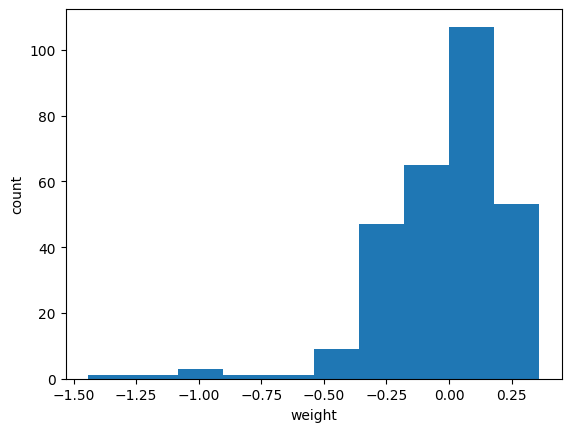

In [ ]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1)) #1차원 배열로 변환
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

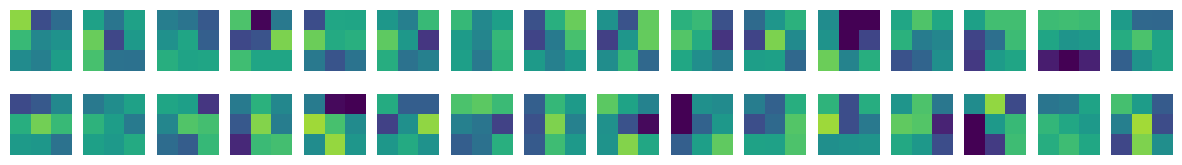

In [ ]:
#32개의 필터를 16개씩 두줄에 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2)) #figsize는 각 subplots 크기가 아닌 전체 그림의 크기

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)#vmin, vmax: 색상의 최소값 최대값을 조정
        axs[i, j].axis('off')
#plt.savefig('8-3-hist.png') -> 그림 저장
plt.show()

결과 그래프를 보면 가중치 값이 무작위로 나열된 것이 아닌 어떤 패턴을 볼 수 있음

참고로 밝은 부분의 값이 높음

첫 번째 줄의 11번째 필터에서 위쪽의 3픽셀의 값이 높음

즉 이 가중치는 직선을 만나면 크게 활성화 될 것임

#신경망의 가중치는 어떻게 선택될까.

In [ ]:
#훈련하지 않은 빈 합성곱 신경망을 만들고 분석해보자
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [ ]:
no_training_conv = no_training_model.layers[0]#첫번째층의 가중치를 변수에 저장

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std(), no_training_weights.max(),no_training_weights.min() )

-0.0070753 0.082949124 0.1421292 -0.14191745


평균은 이전과 동일하게 0에 가깝지만 표준편차는 이전과 달리 매우 작음



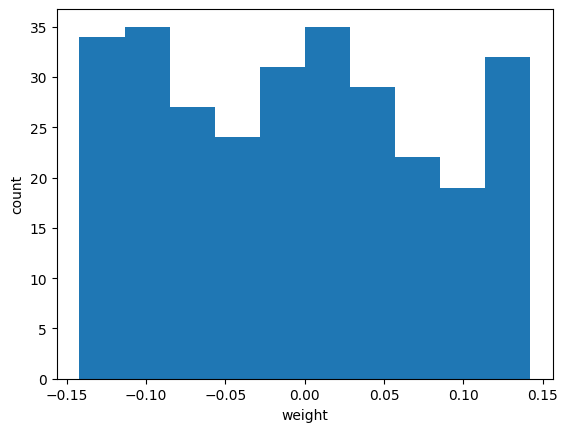

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

비교적 고른 분포를 보임

-> 신경망의 가중치를 초기화할때 균등분포에서 랜덤하게 값을 선택하기 때문

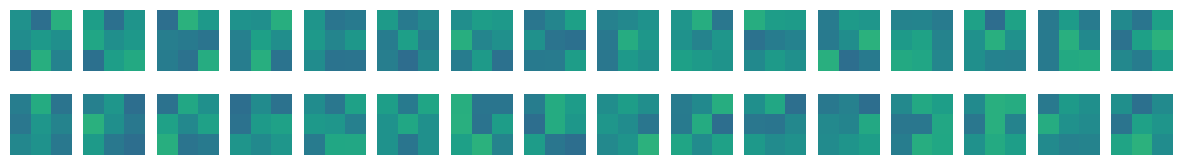

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

#함수형 API

케라스 Sequential 클래스: 층을 차례대로 쌓은 모델

딥러닝에서는 좀 더 복잡한 모델이 존재

입력이 2개일 수도 있고, 출력이 2개일 수도 있음

이러한 경우에는 함수형 API를 사용

함수형API는 케라스의 Model 클래스를 사용해 모델을 만듦

예를 들어 7장에서 만들었던 Dense층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현하면 다음과 같음

dense1 = keras.layers.Dense(100, activation='sigmoid')

dense2 = keras.layers.Dense(10, activation='softmax')

이 두 코드는 7장과 거의 동일

이 객체를 Sequential 클래스 객체의 add() 메서드에 전달할 수 있으나 다음과 같이 함수처럼 호출할 수 있음

hidden = dense1(inputs)



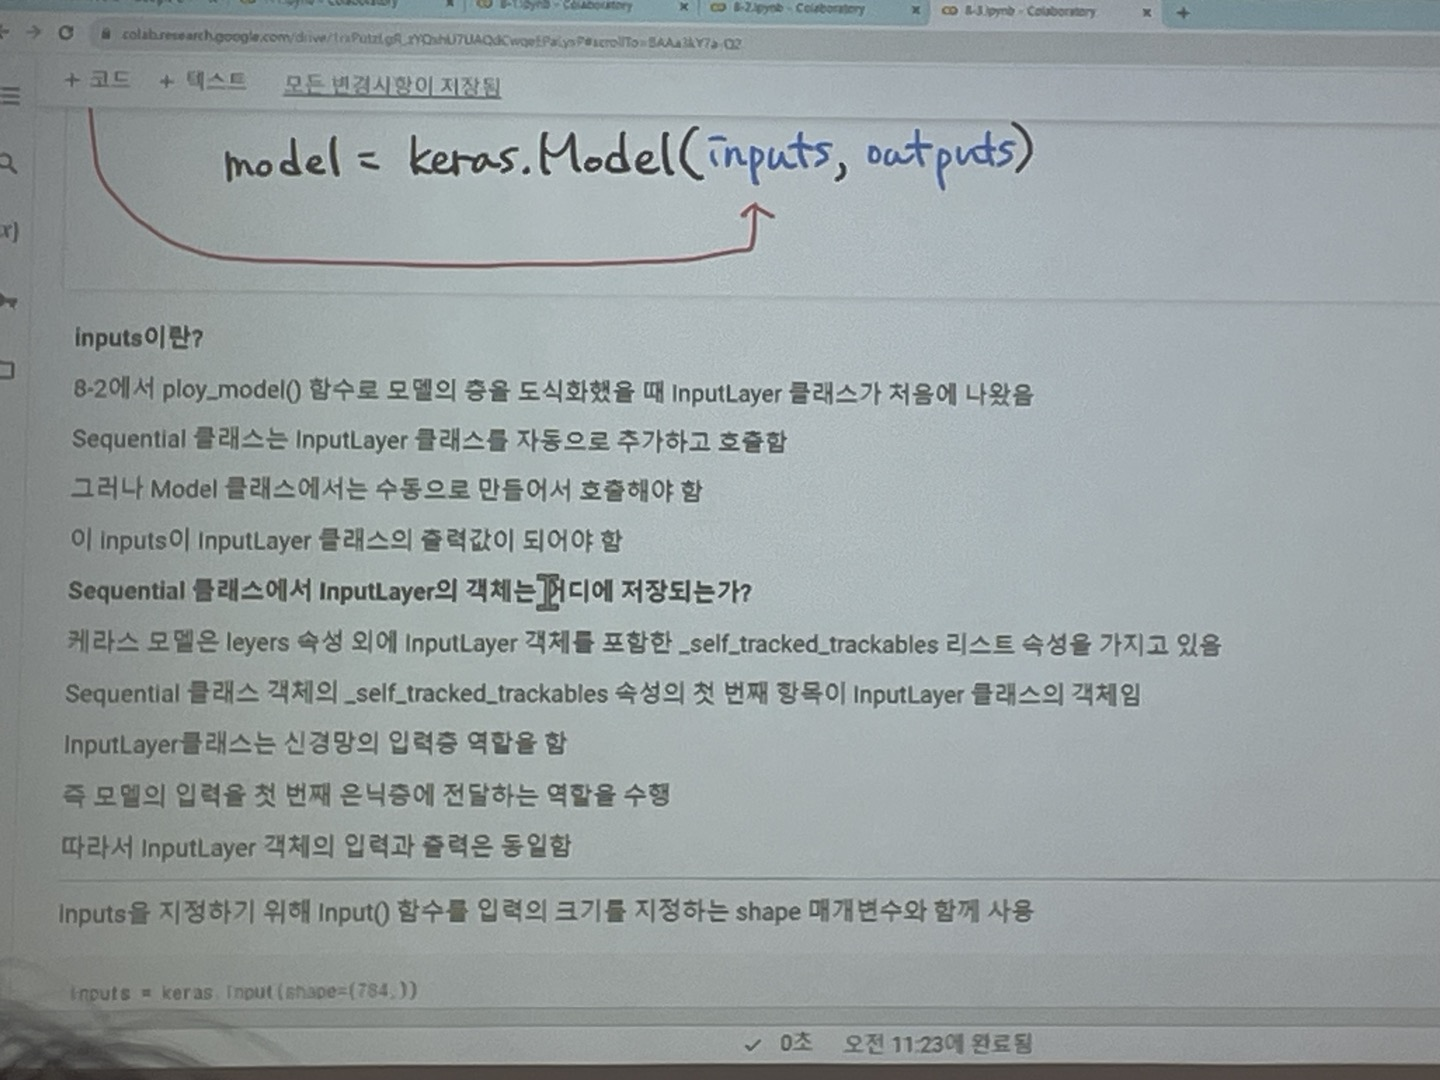![image.png]()inputs이란 InputLayer 클래스

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)
#특정 맵 시각화를 만드는 데에는 함수형 API가 필요.

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


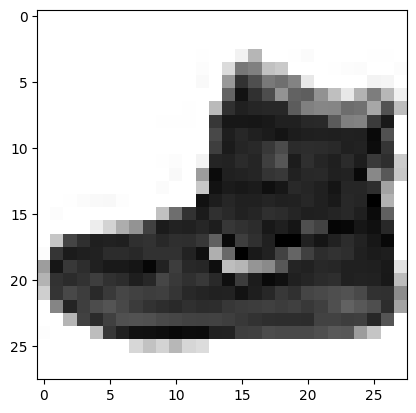

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

이 샘플을 conv_acti모델에 주입해 Conv2D 층이 만드는 특성 맵을 출력해보자

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 1s 653ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


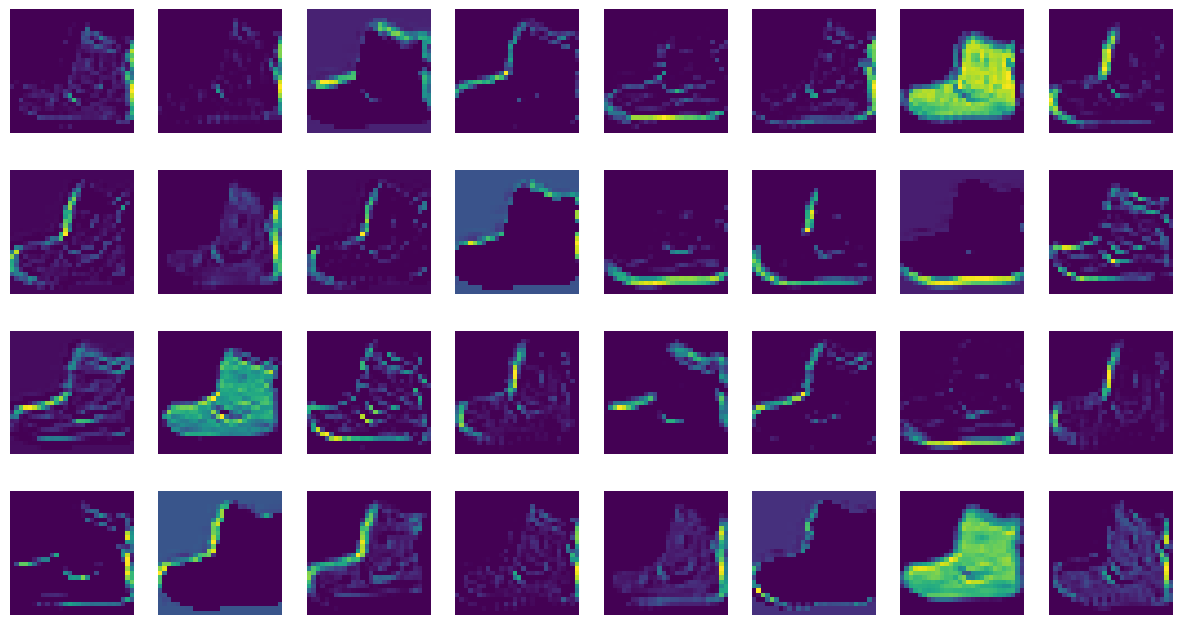

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 83ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


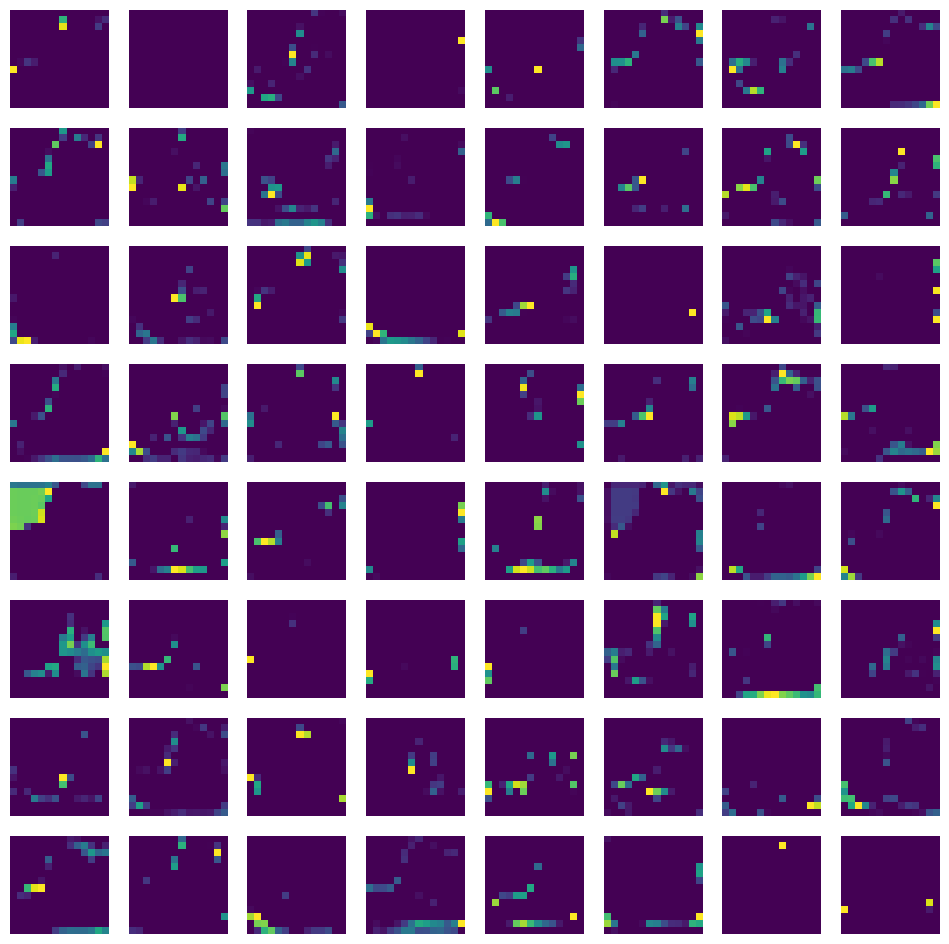

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()